In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/predictions2.tsv', sep="\t")
print(df)

    project_ids  sample_ids genders  doses  target  prediction  \
0     SRP161461  SRR7817611    male    0.0       0           0   
1     SRP161461  SRR7817612    male    0.0       0           0   
2     SRP161461  SRR7817614    male    0.0       0           0   
3     SRP161461  SRR7817615    male    0.0       0           0   
4     SRP161461  SRR7817616    male    0.0       0           0   
..          ...         ...     ...    ...     ...         ...   
294   SRP090688  SRR4317656    male   30.0       1           1   
295   SRP090688  SRR4317657    male   30.0       1           1   
296   SRP090688  SRR4317658    male   30.0       1           1   
297   SRP090688  SRR4317659    male   30.0       1           1   
298   SRP090688  SRR4317660    male   30.0       1           1   

     confidence_class_0  confidence_class_1  confidence_class_2  \
0          8.797235e-01        3.084337e-11        1.179965e-02   
1          8.880861e-01        2.768086e-11        2.159691e-02   
2     

In [3]:
print(df['doses'].dtype)
print(df['doses'].isnull().sum())
print(df['project_ids'].unique())

float64
0
['SRP161461' 'SRP049440' 'SRP075814' 'SRP090688']


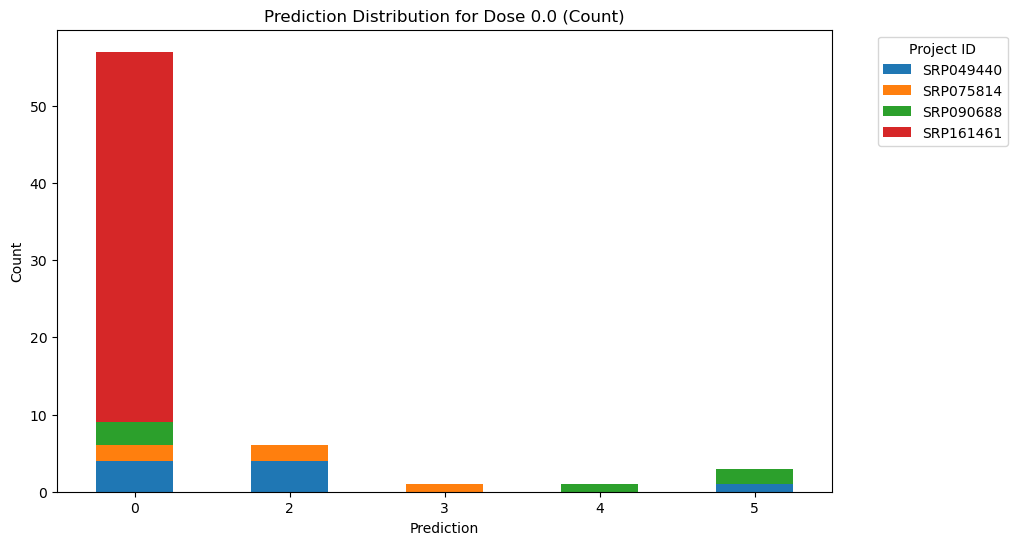

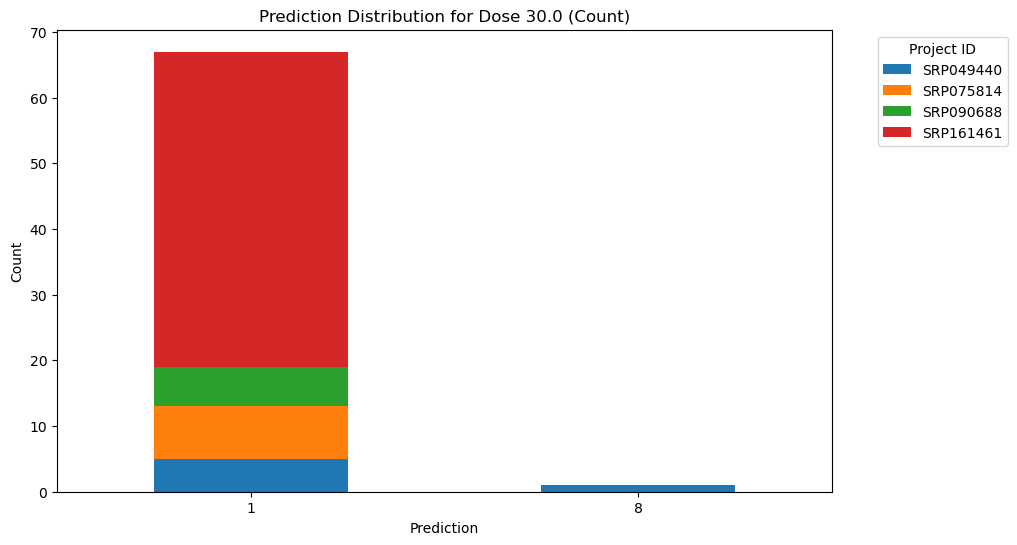

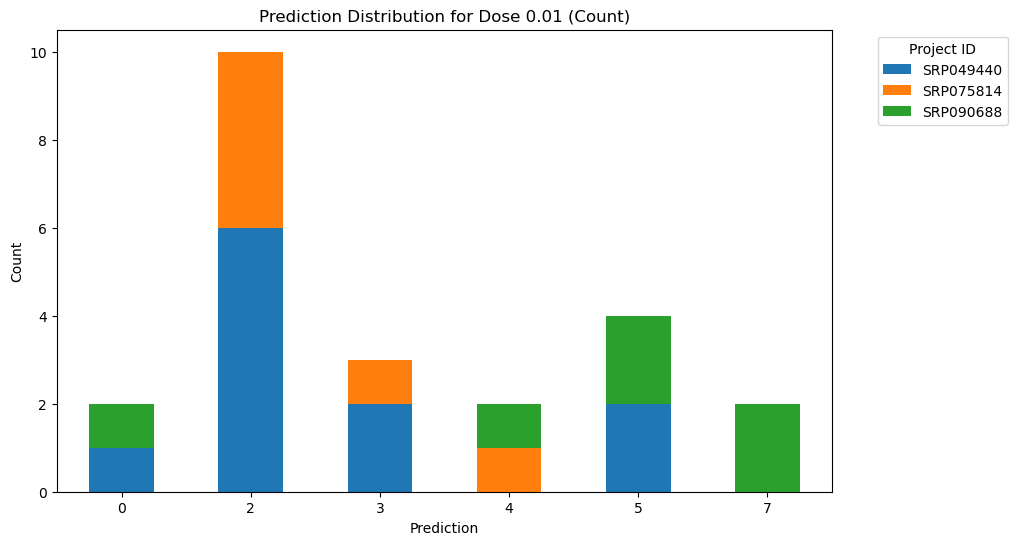

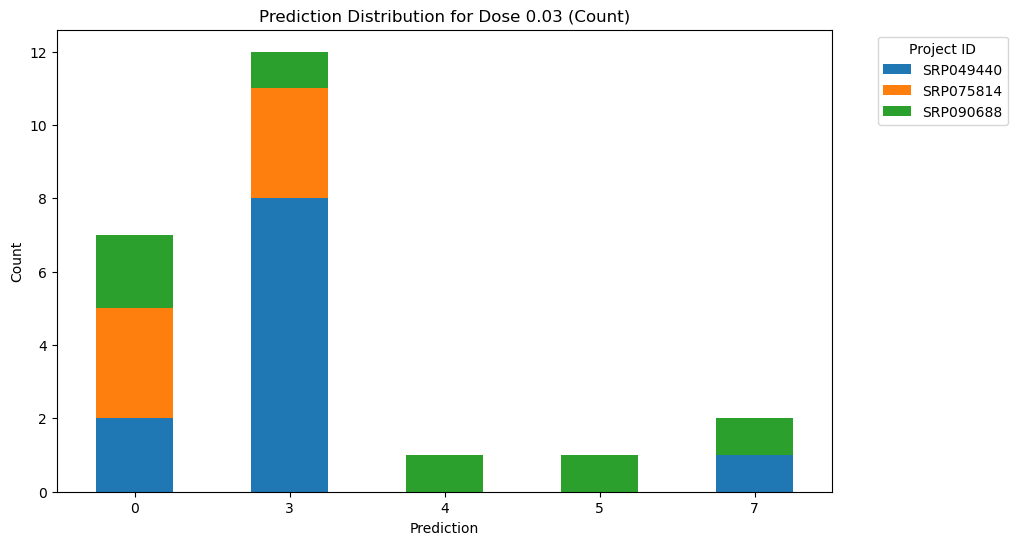

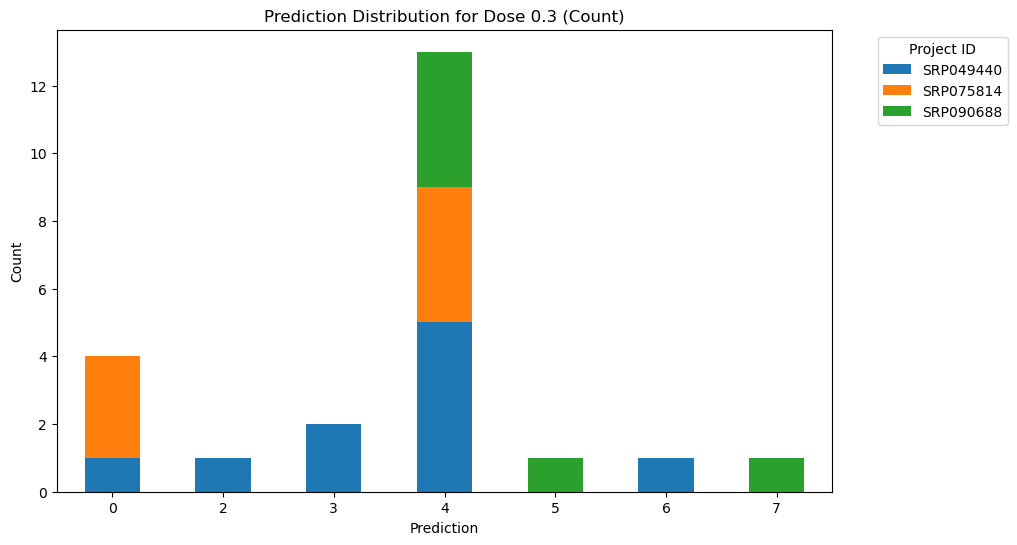

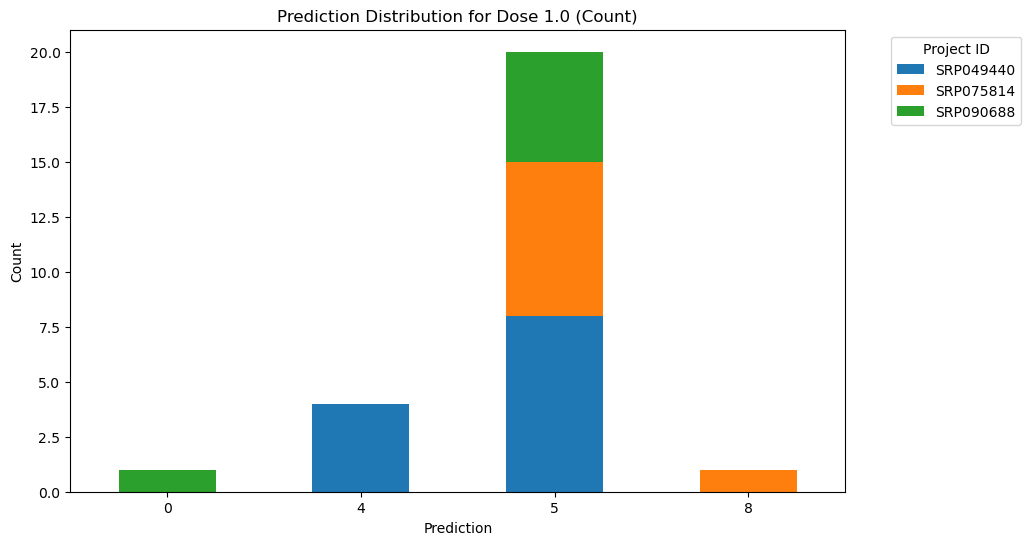

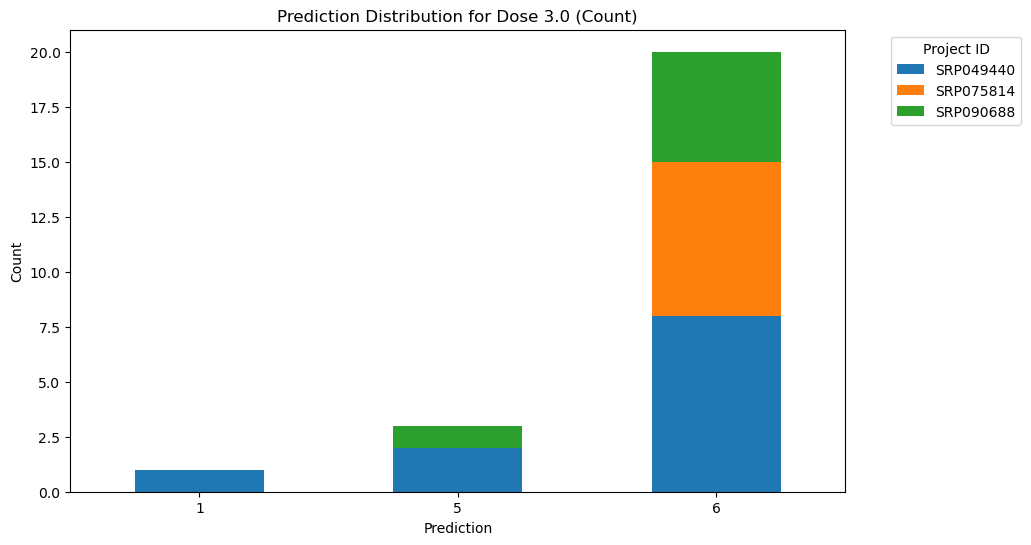

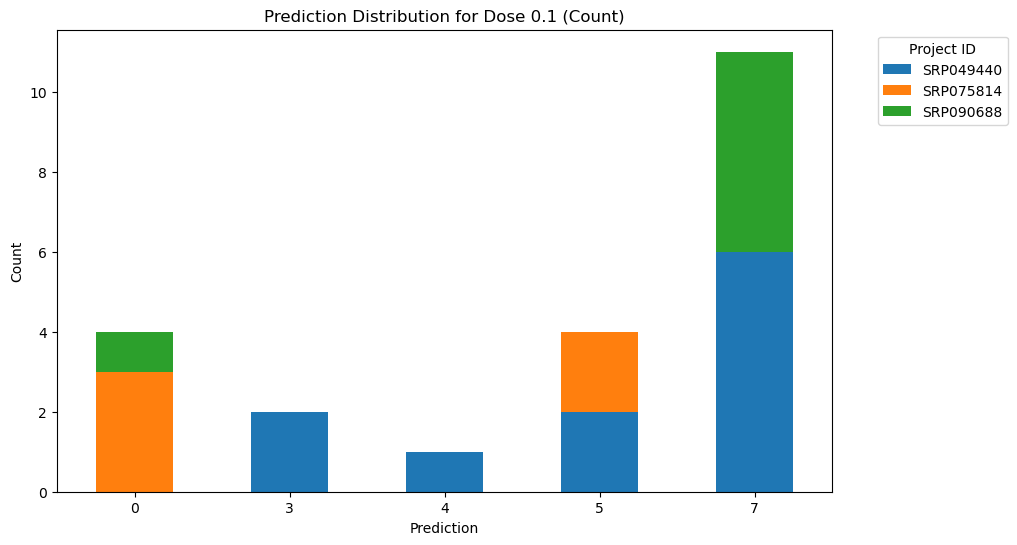

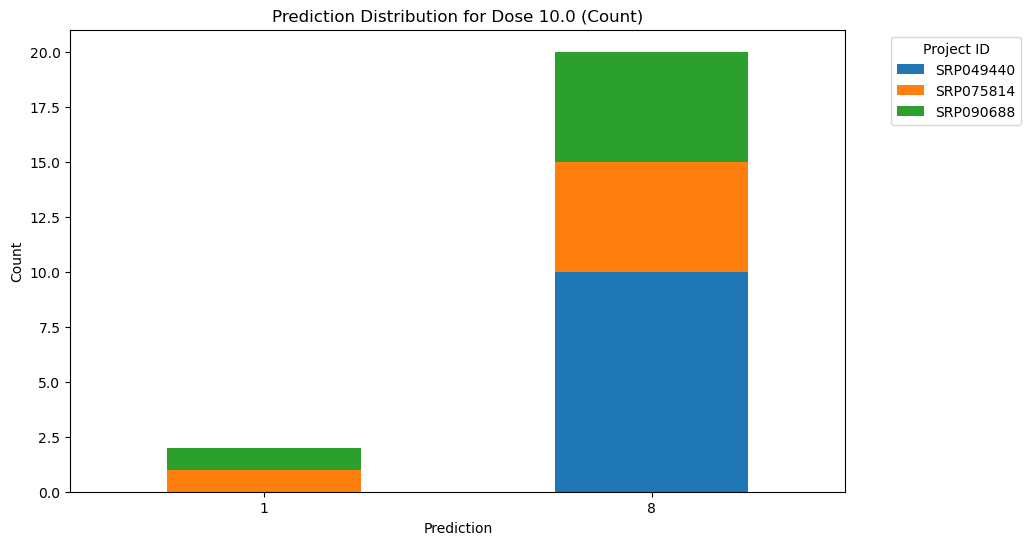

In [3]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


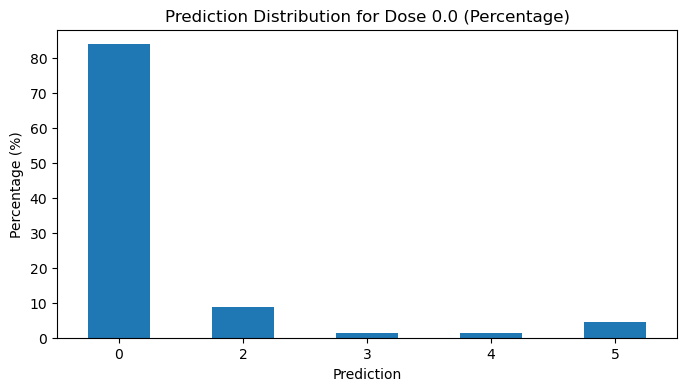

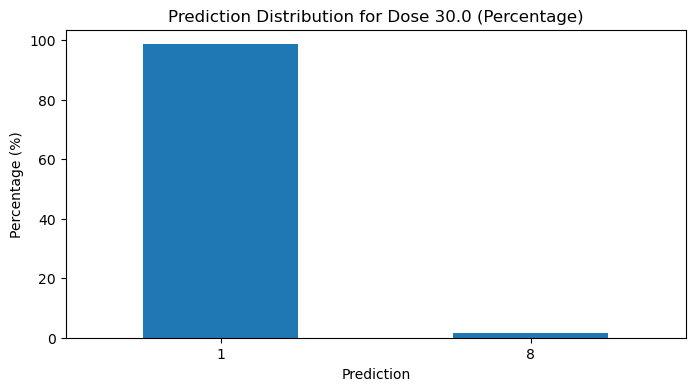

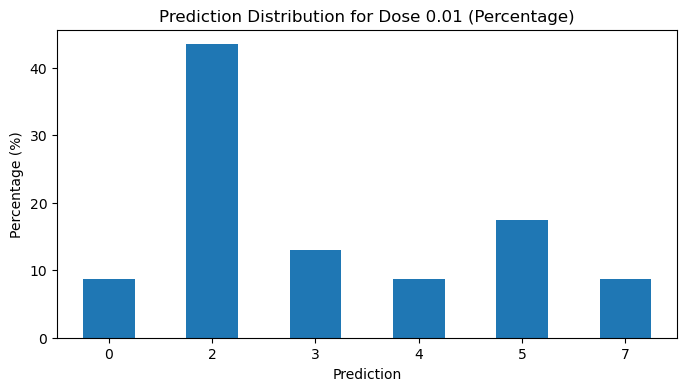

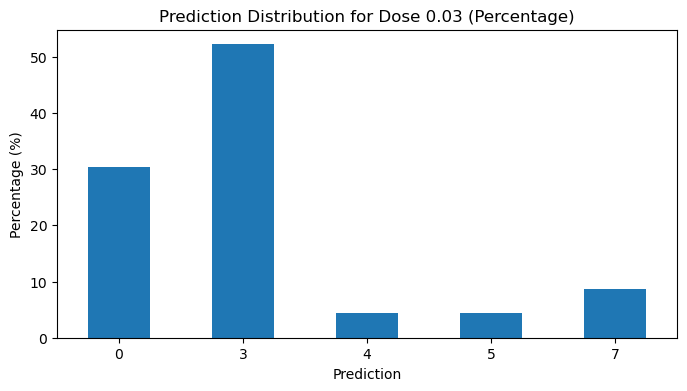

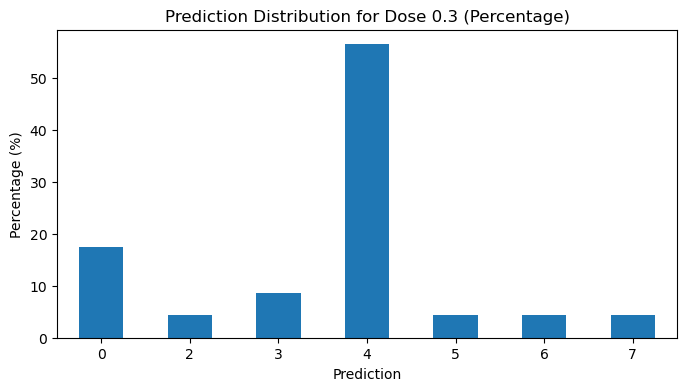

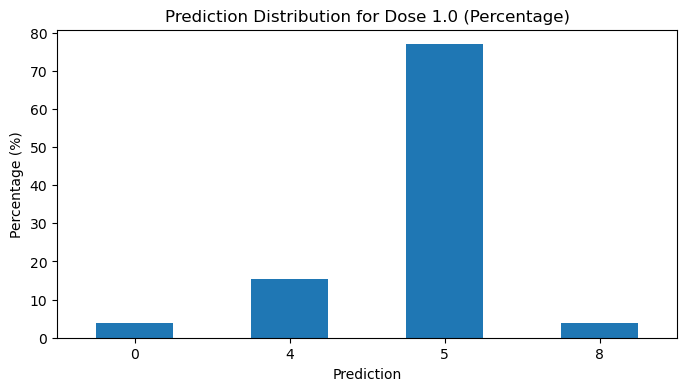

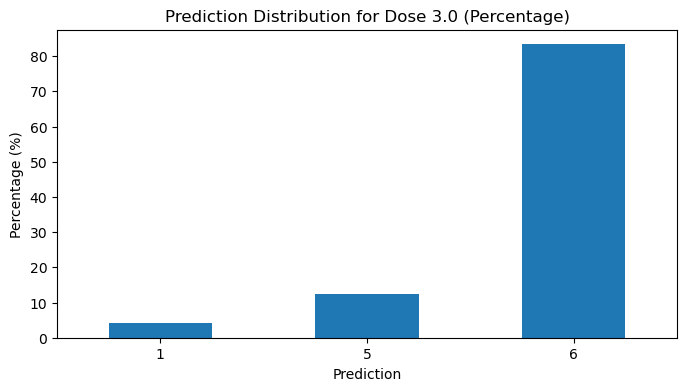

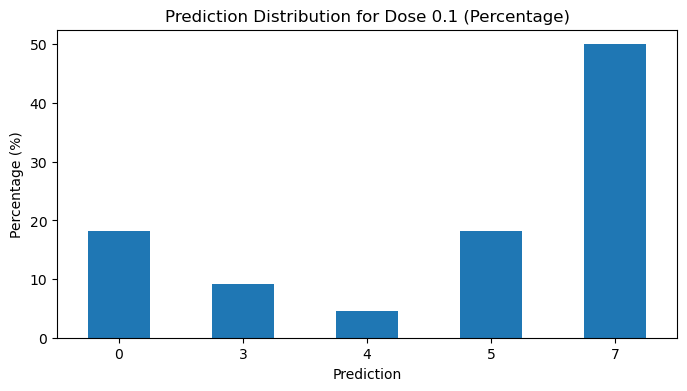

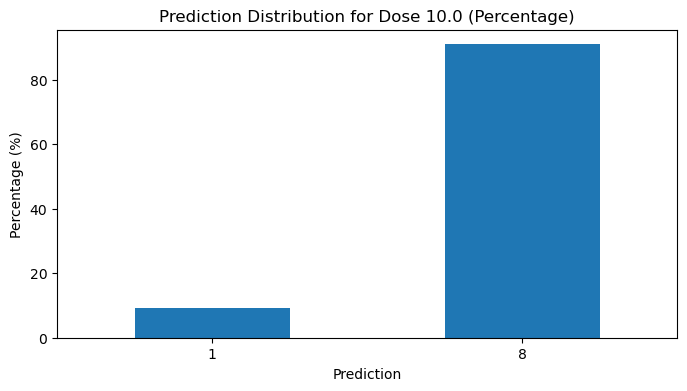

In [4]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    plt.figure(figsize=(8, 4))
    # Calculate percentage and plot
    (subset['prediction'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar')
    plt.title(f'Prediction Distribution for Dose {dose} (Percentage)')
    plt.xlabel('Prediction')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=0)
    plt.show()


In [5]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_0.txt', header=None, sep="\t")
print(ig_0)

             0
0     0.006884
1     0.000351
2     0.005712
3     0.010476
4     0.029339
...        ...
6509  0.010202
6510  0.017843
6511  0.004038
6512  0.003747
6513  0.009660

[6514 rows x 1 columns]


In [6]:
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_1.txt', header=None, sep="\t")
print(ig_1)

             0
0     0.001910
1     0.003675
2     0.057313
3     0.006634
4     0.025109
...        ...
6509  0.043958
6510  0.023457
6511  0.015047
6512  0.003965
6513  0.016900

[6514 rows x 1 columns]


In [7]:
ig_2 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_2.txt', header=None, sep="\t")
ig_3 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_3.txt', header=None, sep="\t")
ig_4 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_4.txt', header=None, sep="\t")
ig_5 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_5.txt', header=None, sep="\t")
ig_6 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_6.txt', header=None, sep="\t")
ig_7 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_7.txt', header=None, sep="\t")
ig_8 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_8.txt', header=None, sep="\t")

In [8]:
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/input/edgeLabels.csv', header=None, sep=" ")
print(edges)

                  0              1
0     R-MMU-9613507  R-MMU-9613545
1     R-MMU-9613545  R-MMU-9613562
2     R-MMU-9613562  R-MMU-9613670
3     R-MMU-9639715  R-MMU-9640117
4     R-MMU-9641089  R-MMU-9641096
...             ...            ...
8551  R-MMU-8856808  R-MMU-8856813
8552  R-MMU-8868651  R-MMU-8868648
8553  R-MMU-8868648  R-MMU-8868661
8554  R-MMU-8868660  R-MMU-8868658
8555  R-MMU-8863721  R-MMU-8863723

[8556 rows x 2 columns]


In [9]:
result = pd.concat([ig_0, ig_1, ig_2, ig_3, ig_4, ig_5, ig_6, ig_7, ig_8, edges], axis=1)
result.columns = ["ig_0", "ig_1", "ig_2", "ig_3", "ig_4", "ig_5", "ig_6", "ig_7", "ig_8", "start", "end"]
print(result)

          ig_0      ig_1      ig_2      ig_3      ig_4      ig_5      ig_6  \
0     0.006884  0.001910  0.066299  0.012831  0.019522  0.021069  0.056008   
1     0.000351  0.003675  0.003596  0.003891  0.011576  0.003239  0.011683   
2     0.005712  0.057313  0.014471  0.042614  0.019404  0.026195  0.024184   
3     0.010476  0.006634  0.033764  0.021301  0.014827  0.039015  0.019217   
4     0.029339  0.025109  0.034348  0.036518  0.033513  0.060371  0.019267   
...        ...       ...       ...       ...       ...       ...       ...   
8551       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8552       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8553       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8554       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8555       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          ig_7      ig_8          start            end  
0     

In [10]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig2 = result.sort_values(by='ig_2', ascending=False)

sorted_by_ig3 = result.sort_values(by='ig_3', ascending=False)

sorted_by_ig4 = result.sort_values(by='ig_4', ascending=False)

sorted_by_ig5 = result.sort_values(by='ig_5', ascending=False)

sorted_by_ig6 = result.sort_values(by='ig_6', ascending=False)

sorted_by_ig7 = result.sort_values(by='ig_7', ascending=False)

sorted_by_ig8 = result.sort_values(by='ig_8', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig0.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig1.csv', sep='\t',index=False)
sorted_by_ig2.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig2.csv', sep='\t',index=False)
sorted_by_ig3.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig3.csv', sep='\t',index=False)
sorted_by_ig4.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig4.csv', sep='\t',index=False)
sorted_by_ig5.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig5.csv', sep='\t',index=False)
sorted_by_ig6.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig6.csv', sep='\t',index=False)
sorted_by_ig7.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig7.csv', sep='\t',index=False)
sorted_by_ig8.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig8.csv', sep='\t',index=False)
